In [248]:
import torch
import torch.nn as nn # for nn.Module
import torch.nn.functional as F # for sigmoid activation function
import numpy as np # for numpy arrays
import matplotlib.pyplot as plt
from torch.autograd import Variable

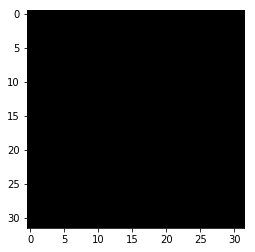

In [249]:
# m x n matrices, m = rows n = cols
# testing out 32x32 with (0,0,0) for RGB values

test1 = np.zeros((32,32,3))
plt.imshow(test1)

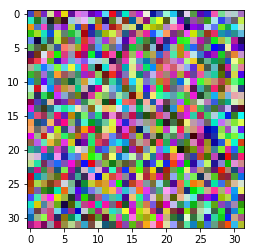

In [250]:
# testing out 32x32 with randomly generated RGB values in each pixel

test2 = np.random.rand(32,32,3)
plt.imshow(test2)

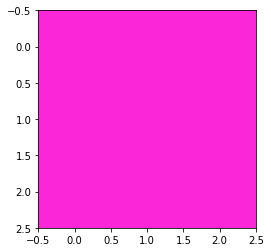

In [274]:
test3_np = np.random.rand(3,3,3)

test3_shape = test3.shape

# converting numpy array to torch tensor - however, for loop breaks
test3_py = torch.from_numpy(test3_np)

for epoch in range(100):
    #r_data = np.random.rand(1)
    #g_data = np.random.rand(1)
    #b_data = np.random.rand(1)
    r_data = torch.rand(1)
    g_data = torch.rand(1)
    b_data = torch.rand(1)
    for r,g,b in zip(r_data, g_data, b_data):
        for i in range(test3_shape[0]):
            for j in range(test3_shape[1]):
                test3[i,j,0] = r
                test3[i,j,1] = g
                test3[i,j,2] = b
    #print (test3)
    #print ("--------------------------------------------")
    
plt.imshow(test3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


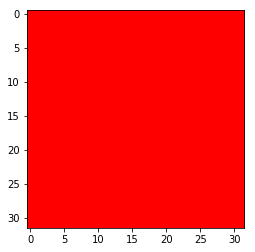

In [252]:
# make red 32x32

red = np.zeros((32,32,3))

red_x_axis = red.shape[0]
red_y_axis = red.shape[1]

for i in range(red_x_axis):
            for j in range(red_y_axis):
                red[i,j,0] = 255
                red[i,j,1] = 0
                red[i,j,2] = 0
                
plt.imshow(red)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


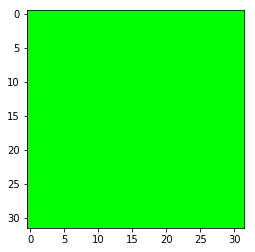

In [253]:
# make green 32x32

green = np.zeros((32,32,3))

green_x_axis = green.shape[0]
green_y_axis = green.shape[1]

for i in range(green_x_axis):
            for j in range(green_y_axis):
                green[i,j,0] = 0
                green[i,j,1] = 255
                green[i,j,2] = 0
                
plt.imshow(green)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


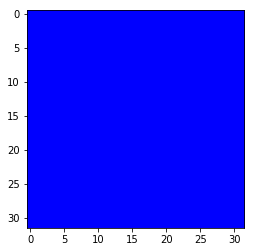

In [254]:
# make blue 32x32

blue = np.zeros((32,32,3))

blue_x_axis = blue.shape[0]
blue_y_axis = blue.shape[1]

for i in range(blue_x_axis):
            for j in range(blue_y_axis):
                blue[i,j,0] = 0
                blue[i,j,1] = 0
                blue[i,j,2] = 255
                
plt.imshow(blue)

blue_torch = torch.from_numpy(blue)

In [297]:
# 0 for white text, 1 for black text
#black, white, red, lime, blue, yellow, cyan, magenta

#x_data = Variable(torch.tensor([[0,0,0],[255,255,255],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255]],dtype=torch.float),requires_grad=True)
#y_data = Variable(torch.tensor([[0],[1],[0],[1],[0],[1],[1],[0]],dtype=torch.float),requires_grad=True)

x_data = Variable(torch.tensor([[0,0,0],[255,255,255],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255]],dtype=torch.float))
y_data = Variable(torch.tensor([[0],[1],[0],[1],[0],[1],[1],[0]],dtype=torch.float))

In [298]:
class Net(nn.Module): # nn.Module is the parent class
    def __init__(self):
        super(Net,self).__init__() # super used to pass arguments of child class to parent class
        self.linear = nn.Linear(3,1) # 32x32 input = 1024
        
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x)) # wrap linear input with sigmoid
        return y_pred
        
# our model
net = Net()

In [299]:
criterion = torch.nn.BCELoss(size_average=True) # binary cross entropy loss
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # learning rate 0.01

In [301]:
# training loop

for epoch in range(500):
    y_pred = net(x_data)
    
    # compute and print loss
    loss = criterion(y_pred,y_data)
    print (epoch, loss.data.item())

    # zero the gradients, perform backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > 0.5)
hour_var = Variable(torch.Tensor([[7.0]]))
print("predict 7 hours", 7.0, model(hour_var).data[0][0] > 0.5)

0 26.629920959472656
1 26.63184356689453
2 26.633739471435547
3 26.63561248779297
4 26.637454986572266
5 26.63927459716797
6 26.64107322692871
7 26.642845153808594
8 26.644596099853516
9 26.646324157714844
10 26.648033142089844
11 26.64971923828125
12 26.651386260986328
13 26.653030395507812
14 26.654659271240234
15 26.656265258789062
16 26.657855987548828
17 26.659427642822266
18 26.660980224609375
19 26.662517547607422
20 26.664039611816406
21 26.665542602539062
22 26.667028427124023
23 26.668498992919922
24 26.66995620727539
25 26.671398162841797
26 26.672828674316406
27 26.674240112304688
28 26.67563819885254
29 26.67702293395996
30 26.678394317626953
31 26.679752349853516
32 26.68109893798828
33 26.682430267333984
34 26.683752059936523
35 26.68505859375
36 26.686355590820312
37 26.687641143798828
38 26.688915252685547
39 26.690176010131836
40 26.69142723083496
41 26.69266700744629
42 26.69389533996582
43 26.69511604309082
44 26.69632339477539
45 26.697525024414062
46 26.6987113952

NameError: name 'model' is not defined